In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
data= pd.read_csv('merged_titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

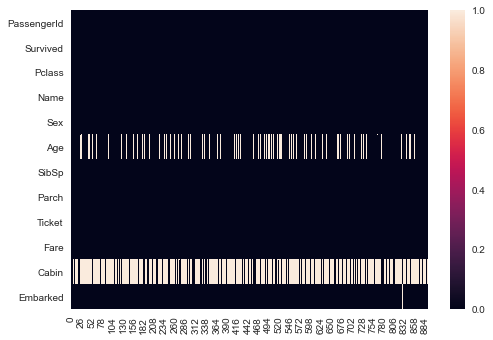

In [4]:
# Note to avoid future confusion, the heatmap shows the null values, the bright spots signify that .isnull returns True there.
# the dark area represents areas where data exists. All the transpose does is swaps the axes to make it easier to read where the majority of the 
# null values lie. It is also quite easy to tell where most of the null values lie given the .info output in the cell prior.
# I think that the best bet to clean this data is to drop the Cabin column since there are too many null values to perform imputation. I will
# Try some imputation methods for age however since only around 170 are missing, it shouldn't be hard to 'estimate' their age given the other data on other # passengers that share similar qualities with the age-less passengers
sns.heatmap(data.isnull().transpose())

In [5]:
data= data.drop(columns=['Cabin'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
# Note to self, if you decide to add dummy variables to some of the categorical data here, make sure you make k-1 dummy variables (1 less than the number of categorical outputs), so as not to fall for the dummy variable trap which would cause perfect multicollinearity in at least two of the dummy variables.
# Since KNN seems viable here as a means as imputating the missing ages, here is a link to a valuable article:
# 'https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e'

In [7]:
# Using pandas one-hot encoding to convert columns into dummy variables (Drop_First=True avoids falling into the dummy variable trap)
dummy_vars = data[['Sex', 'Embarked']]
dummies = pd.get_dummies(dummy_vars, drop_first=True)
dummies.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [8]:
# Dropping columns that I won't use since they either provide no information to me or are to be replaced with the dummy variables
data = data.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis= 1)
data = pd.concat([data, dummies], axis= 1)

data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [9]:
# Importing the method of imputing and normalization -- since knn uses linear distance, it is important that all data is scaled so one column doesn't
# grossly impact the imputation process just because it contains larger numbers. The scaling process can be undone after imputation and the desire is
# that it will convert the scaled imputed ages into realistic approximations to the missing data.
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [10]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


In [11]:
# n_neighbors=5 means that the unknown ages will be set using the most common age found by the ageless-passenger's 5 closest neighbors
# this is valid because, we have data here such as fare, or passenger class that are valuable instruments to approximate somebodys age.
# if the majority of first class are above the age of 30 then an ageless-passenger in first class can be approximated using this method to be a similar age
# to other first class passengers.
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data), columns= data.columns)

data.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [12]:
data = pd.DataFrame(scaler.inverse_transform(data), columns = data.columns)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


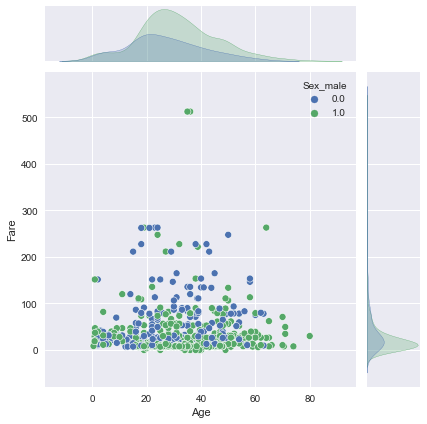

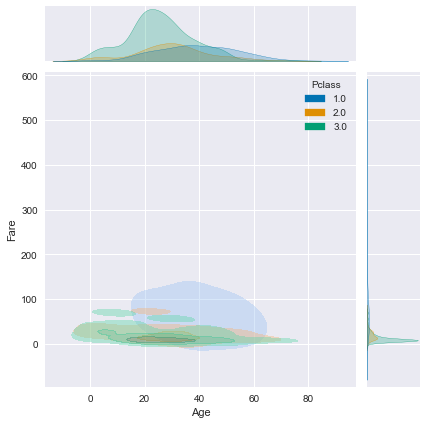

In [13]:
sns.jointplot(data= data, x='Age', y= 'Fare', hue='Sex_male', kind='scatter')
sns.jointplot(data= data, x='Age', y= 'Fare', hue='Pclass', kind='kde', alpha=0.4, fill=True, palette= 'colorblind', levels=4)

In [14]:
np.sum(data['Pclass'] == 3.0)

491

<AxesSubplot:>

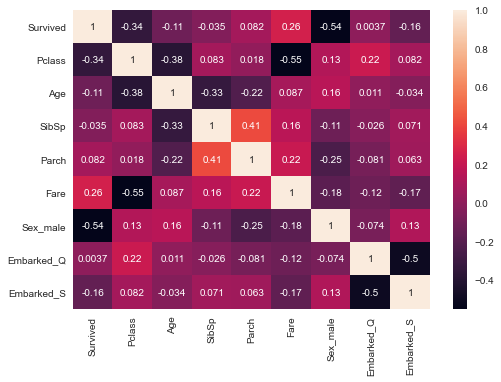

In [15]:
sns.heatmap(data= data.corr(), annot=True)

In [16]:
print(f'{np.sum(data["Survived"]== 1)} people survived whereas {np.sum(data["Survived"]== 0)} died')

342 people survived whereas 549 died


In [17]:
# The data I am interested in here is primarily the first row / column since I will be interested in predicting whether a passenger survived or not
# here I see a few areas where the correlation between a column and survival is high enough to warrent being part of the classification model
# Namely, Pclass has quite high negative correlation with survival rate suggesting that those passengers in higher classes (decending quality) were more
# likely to perish, similarly with Sex_male, implying that men were less likely to survive, conversly, women had a much higher survival rate.
# Unsurprisingly, there is also strong correlation between survival and fare and it's not hard to imagine why. 

# what is surprising however is the low correlation of age to survival, I would have expected there to be a much larger negative correlation between the two
# given the famous perogative demanding that the women and children be the first to evacuate, perhaps the ratio of aged women to children that evacuated
# is close to 1 meaning that for every child there was close to 1 adult woman with them, this would explain the reason for minor correlation.

In [18]:
# In  order to build the best possible model, and given that there is no best in slot classifier for all cases, I will have to test
# various classifiers. I will evaluate each model according to the precision and recall of the classification matrix and select the best model
# based on those metrics.

In [19]:
# Using pipelines to avoid data contamination and to keep each classifier seperate.
# Importing train test split to split the data into a training set and a testing set
# Importing standard scaler so that I can fit my data to the bounds of the logistic function
# Importing classification metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
x= data.drop(['Survived'], axis= 1)
y= data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state= 1)

# Classifier 1, Logistic Classifier

In [21]:
# Importing the classifier
from sklearn.linear_model import LogisticRegression

In [22]:
# Creating the pipeline - this combines the scaling and estimating process when .fit is run on the pipeline object
logpipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logclass', LogisticRegression())
])

# Gridsearch requires a dictionary of parameters to iterate through the model with in order to select the best one according to the set scoring method.
logit_param_grid = {
    'logclass__C': (0.01, 0.1, 1, 10),
    'logclass__solver': ['saga'],
    'logclass__penalty': ('l1', 'l2'),
    'logclass__fit_intercept': (True, False),
    'logclass__max_iter': (100, 500, 1000, 2000)
}

In [23]:
# Fitting the classifier pipeline to the training data, scoring how well it did and creating a classification report detailing the precision and recall of 
# the model
logpipe.fit(x_train, y_train)

print('\n\n')
print(logpipe.score(x_test, y_test))
print('\n\n')
print(classification_report(y_test, logpipe.predict(x_test)))
print('\n\n')
print(confusion_matrix(y_test, logpipe.predict(x_test)))




0.7932203389830509



              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       174
         1.0       0.78      0.69      0.73       121

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295




[[150  24]
 [ 37  84]]


In [24]:
# Instantiating the grid search object and feeding it the pipeline as the estimator method as well as the parameter grid. I set the scoring to f1 since it 
# finds a good balance of maximising both precision and recall. Accuracy would not be a poor choice here however the data is not perfectly balanced as 
# evident above where the cell shows the difference between those who survived and those who perished.
gs_logit = GridSearchCV(logpipe, logit_param_grid, scoring= ('f1'))
gs_logit.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logclass', LogisticRegression())]),
             param_grid={'logclass__C': (0.01, 0.1, 1, 10),
                         'logclass__fit_intercept': (True, False),
                         'logclass__max_iter': (100, 500, 1000, 2000),
                         'logclass__penalty': ('l1', 'l2'),
                         'logclass__solver': ['saga']},
             scoring='f1')

In [25]:
# Similar methods of evaluating the classifier, I put this in its own cell because gridsearch can take a long time to compute 
print('\n\n')
print(gs_logit.best_estimator_.score(x_test, y_test))
print('\n\n')
print(classification_report(y_test, gs_logit.best_estimator_.predict(x_test)))
print('\n\n')
print(confusion_matrix(y_test, gs_logit.best_estimator_.predict(x_test)))




0.7932203389830509



              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       174
         1.0       0.78      0.69      0.73       121

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295




[[150  24]
 [ 37  84]]


In [26]:
# printing the values from the parameter dictionary that the gridsearch used to achieve the best scoring model.
gs_logit.best_params_

{'logclass__C': 1,
 'logclass__fit_intercept': True,
 'logclass__max_iter': 100,
 'logclass__penalty': 'l2',
 'logclass__solver': 'saga'}

### Logistic classifier, my thoughts

it was surprising to see that, in the end, there was no improvement at all when using a gridsearch to try and optimise the hyperparameters. Both models achieve the same f1 score which sits just below .8. Whether this is the best model to use in this case remains to be seen since I have not tested the other classification methods that I want to at this point.

# Classifier 2, Support Vector Machine

In [27]:
from sklearn.svm import SVC

In [28]:
svcpipe = Pipeline([
    ('scaler', StandardScaler()),
    ('SVC', SVC())
])

svc_param_grid = {
    'SVC__C': (0.01, 0.1, 1, 10),
    'SVC__gamma': ('scale', 'auto'),
    'SVC__kernel': ('linear', 'poly', 'rbf', 'sigmoid')    
}

In [29]:
svcpipe.fit(x_train, y_train)

print('\n\n')
print(svcpipe.score(x_test, y_test))
print('\n\n')
print(classification_report(y_test, svcpipe.predict(x_test)))
print('\n\n')
print(confusion_matrix(y_test, svcpipe.predict(x_test)))




0.7898305084745763



              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84       174
         1.0       0.86      0.58      0.69       121

    accuracy                           0.79       295
   macro avg       0.81      0.76      0.77       295
weighted avg       0.80      0.79      0.78       295




[[163  11]
 [ 51  70]]


In [30]:
gs_SVC = GridSearchCV(svcpipe, svc_param_grid, scoring= ('f1'))
gs_SVC.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC())]),
             param_grid={'SVC__C': (0.01, 0.1, 1, 10),
                         'SVC__gamma': ('scale', 'auto'),
                         'SVC__kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             scoring='f1')

In [31]:
print('\n\n')
print(gs_SVC.best_estimator_.score(x_test, y_test))
print('\n\n')
print(classification_report(y_test, gs_SVC.best_estimator_.predict(x_test)))
print('\n\n')
print(confusion_matrix(y_test, gs_SVC.best_estimator_.predict(x_test)))




0.7762711864406779



              precision    recall  f1-score   support

         0.0       0.76      0.90      0.83       174
         1.0       0.81      0.60      0.69       121

    accuracy                           0.78       295
   macro avg       0.79      0.75      0.76       295
weighted avg       0.78      0.78      0.77       295




[[157  17]
 [ 49  72]]


In [32]:
gs_SVC.best_params_

{'SVC__C': 10, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}

### SVC, my thoughts

the default SVC using svcpipe performed better than the gridsearch alternative, this could be due to the combination of hyperparameters used in the parameter dictionary but I also suspect that it is due to the gridsearch choosing the regularization parameter to be 10 as opposed to the default value of 1 despite 1 being in the parameter dictionary. As such, My thoughts on this model will be based on the better performing model - svcpipe

The SVC is marginally worse than the logit classification models in terms of f1 score, however, the svc does score higher in the recall of passengers that did not survive making it a more pessimistic model, minimising the chance of false positives at the cost of increasing false negatives. I'm sure that there is a use case where a pessimistic model like this would be advantageous over the logit model but from an accuracy perspective, the logit model correctly classifies 1 more case than the SVC making it marginally better.